In [1]:
# https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361
# https://shapely.readthedocs.io/en/latest/manual.html

# Geospatial adventures of a data scientist.

In [2]:
!pip install shapely

In [3]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection
import numpy as np

In [4]:
pt = Point(10, 10)
pt1 = Point(100, 101)

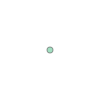

In [7]:
pt

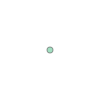

In [8]:
pt1

In [10]:
from shapely import wkt

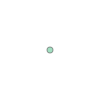

In [12]:
wkt.loads( str(pt))

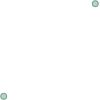

In [16]:
GeometryCollection( (pt,pt1) )

In [18]:
pt.distance(pt1)

127.98828071350908

In [21]:
pt.name ="This point"
pt.name

'This point'

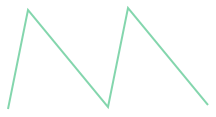

In [22]:
ln = LineString([(0, 1), (20, 100), (100, 3), (120, 102), (200, 5)])
ln

In [23]:
np.array(ln)

array([[  0.,   1.],
       [ 20., 100.],
       [100.,   3.],
       [120., 102.],
       [200.,   5.]])

In [24]:
list(ln.coords)

[(0.0, 1.0), (20.0, 100.0), (100.0, 3.0), (120.0, 102.0), (200.0, 5.0)]

In [25]:
list(ln.xy[0]), list(ln.xy[-1])

([0.0, 20.0, 100.0, 120.0, 200.0], [1.0, 100.0, 3.0, 102.0, 5.0])

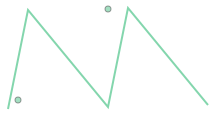

In [27]:
GeometryCollection( (pt,pt1, ln) )

In [28]:
pt.distance(ln)

8.01980198019802

In [29]:
pt1.distance(ln)

19.405940594059405

In [32]:
ln.project(pt), ln.length

(10.801980198019802, 453.46769176178475)

In [33]:
list(ln.interpolate(ln.project(Point(1, 1))).coords)

[(0.039211841976276834, 1.1940986177825703)]

In [34]:
[np.array(a) for a in ln.intersection(
    LineString([
        (0, 0),
        (200, 100)
    ])
)]

[array([72.55474453, 36.27737226]),
 array([110.56179775,  55.28089888]),
 array([144.52554745,  72.26277372])]

In [37]:
poly = Polygon( [(0,0), (0,1), (1,1), (1,0)])

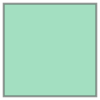

In [38]:
poly

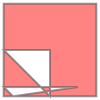

In [44]:
poly = Polygon( 
    [(0,0), (0,1), (1,1), (1,0)],
    [
      [(0,0.5), (0,.5), (.5,.5), (.5,0)],
     
      [(0,0.1), (0,.1), (.8,.1), (.1,0)]
    ]
    )

poly

In [45]:
np.array(poly.exterior)

array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.]])

In [46]:
[np.array(a) for a in poly.interiors]

[array([[0. , 0.5],
        [0. , 0.5],
        [0.5, 0.5],
        [0.5, 0. ],
        [0. , 0.5]]), array([[0. , 0.1],
        [0. , 0.1],
        [0.8, 0.1],
        [0.1, 0. ],
        [0. , 0.1]])]

In [47]:
np.array(poly.centroid)

array([0.53453094, 0.54570858])

In [52]:
#Point(0.7, 0.7).within(poly) #,
poly.contains(Point(0.7, 0.7))

TopologyException: side location conflict at 0.40000000000000002 0.10000000000000001


TopologicalError: ignored